# Tutorial for Cancer-Biomarkers-from-Clinical-Data

## 1. Data loading and preprocessing

### 1.1. Import the necessary modules

In [1]:
# Library imports
import matplotlib.pyplot as plt

# Add the path to the src folder
import sys
sys.path.append('src')

# Import data preprocessing functions
from data_preprocessing import load_data, feature_label_split

### 1.2. Load the data

In [2]:
categories, dfs = load_data('data/clinical_cancer_data.xlsx')

list(enumerate(categories))

[(0, 'Breast'),
 (1, 'Colorectum'),
 (2, 'Esophagus'),
 (3, 'Liver'),
 (4, 'Lung'),
 (5, 'Normal'),
 (6, 'Ovary'),
 (7, 'Pancreas'),
 (8, 'Stomach')]

## 2. Random forest model for `Normal`, `Ovary` and `Pancreas` samples

### 2.1. Import the necessary modules

In [3]:
from random_forest_model import rf_normal_cancers, plot_important_biomarkers

### 2.2. Random forest classification for `Normal + Ovary` samples

In [4]:
important_biomarkers_normal_ovary = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs, 
                                                      cancer1_category_index = 6, 
                                                      iterations = 100,
                                                      threshold = 0.05)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
3      CA-125     0.159995
29  Prolactin     0.109398
18       IL-6     0.099734
35       TGFa     0.094122
31       sFas     0.075817


### 2.3. Random forest classification for `Normal + Pancreas` samples

In [5]:
important_biomarkers_normal_pancreas = rf_normal_cancers(categories = categories, 
                                                         dfs = dfs, 
                                                         cancer1_category_index = 7, 
                                                         iterations = 100, 
                                                         threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9389

Biomarkers with Importance >= 0.05:
               Biomarker  Importance
5                CA19-9     0.142069
19                 IL-8     0.094102
18                 IL-6     0.080587
33  sHER2/sEGFR2/sErbB2     0.077110
27                  OPN     0.060258
15                GDF15     0.057668
23              Midkine     0.050770


### 2.4. Random forest classification for `Normal + Ovary + Pancreas` samples

In [6]:
important_biomarkers_normal_ovary_pancreas = rf_normal_cancers(categories = categories, 
                                                               dfs = dfs, 
                                                               cancer1_category_index = 6, 
                                                               cancer2_category_index = 7, 
                                                               iterations = 100, 
                                                               threshold = 0.05)

Random forest classification: Normal + Ovary + Pancreas

Average Accuracy over 100 iterations: 0.9112

Biomarkers with Importance >= 0.05:
               Biomarker  Importance
3                CA-125     0.096122
33  sHER2/sEGFR2/sErbB2     0.080629
18                 IL-6     0.068114
31                 sFas     0.064917
5                CA19-9     0.059329
29            Prolactin     0.056096


### 2.5. Plot the important biomarkers side-by-side

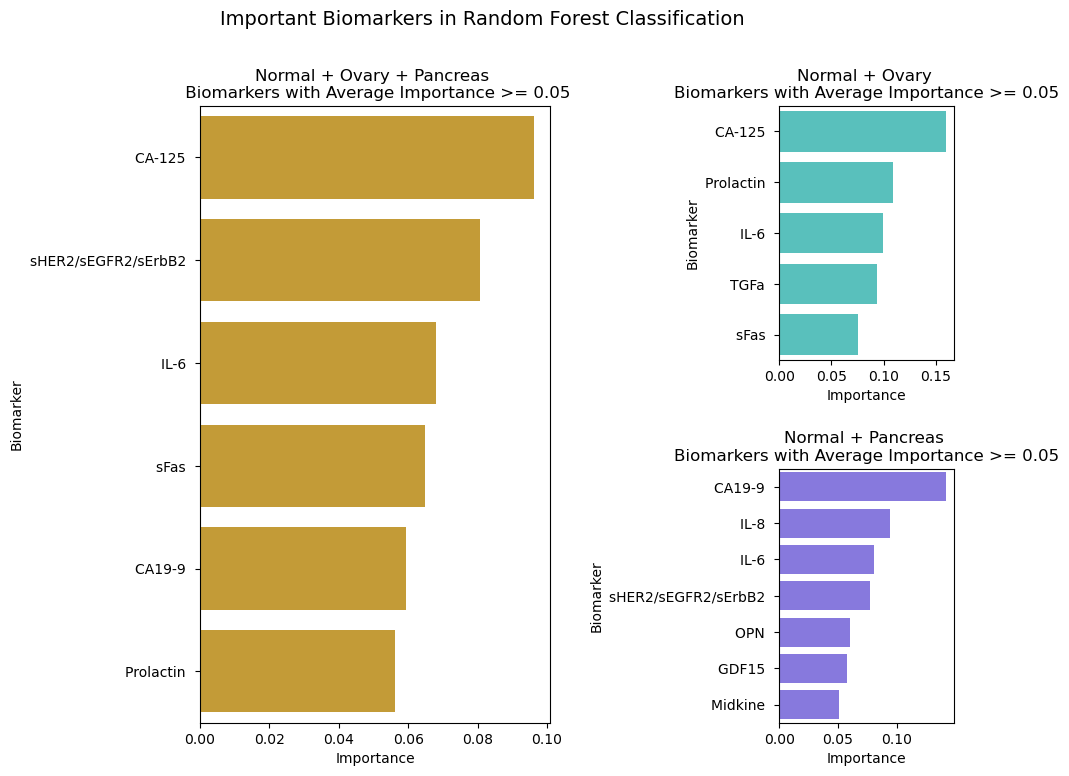

In [10]:
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

ax1 = plt.subplot(grid[:, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[1, 1])

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_ovary_pancreas,
                          datasets = ['Normal', 'Ovary', 'Pancreas'],
                          threshold = 0.05,
                          color = 'goldenrod',
                          ax = ax1)

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_ovary,
                          datasets = ['Normal', 'Ovary'],
                          threshold = 0.05,
                          color = 'mediumturquoise',
                          ax = ax2)

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_pancreas,
                          datasets = ['Normal', 'Pancreas'],
                          threshold = 0.05,
                          color = 'mediumslateblue',
                          ax = ax3)

fig.suptitle("Important Biomarkers in Random Forest Classification", fontsize=14)
fig.tight_layout(pad=2.0)
plt.show()

## 3. Random forest model for `Normal`, `Breast` and `Colorectum` samples

Now we see an example where the important biomarkers given by random forest classifier might not be suitable in practical scenario for distinguishing between different cancer types from normal samples. 

### 3.1. Random forest classification for `Normal + Breast` samples

As per the random forest classifier, the important biomarkers for distinguishing between `Normal` and `Breast` samples are the following:
* `TGFa` (35)
* `IL-8` (19)
* `IL-6` (18)
* `Prolactin` (29)
* `CYFRA 21-1` (8)

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are the most important ones in seperating `Normal` and `Colorectum` samples, as shown below. And they can be found in higher levels in some other cancer types, such as `Esophagus`. In fact, `IL-6` and `IL-8` Q3 value is the lowest in `Breast` samples among all the cancer types.

Also, we can have a look at the descriptive statistics of `TGFa` to see that it's Q1, Q2 and Q3 values are very close, and in some cases virtually indistinguishable, in `Breast`, `Colorectum`, `Lung`, `Pancreas` and even `Normal` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Breast` samples.

`CYFRA 21-1` Q1, Q2 and Q3 values are very close in `Breast` and `Colorectum` samples, and can be found in higher levels in the other cancer types. In fact, the Q3 value of `CYFRA 21-1` is the lowest in `Breast` samples among all the cancer types.

In [11]:
important_biomarkers_normal_breast = rf_normal_cancers(categories = categories, 
                                                       dfs = dfs,
                                                       cancer1_category_index = 0,
                                                       iterations = 100,
                                                       threshold = 0.05)

Random forest classification: Normal + Breast

Average Accuracy over 100 iterations: 0.9630

Biomarkers with Importance >= 0.05:
      Biomarker  Importance
35        TGFa     0.100919
19        IL-8     0.087020
18        IL-6     0.085325
29   Prolactin     0.055615
8   CYFRA 21-1     0.052147


### 3.2. Random forest classification for `Normal + Colorectum` samples

As per the random forest classifier, the important biomarkers for distinguishing between `Normal` and `Colorectum` samples are the following:
* `IL-8` (19)
* `IL-6` (18)
* `OPN` (27)
* `HGF` (17)
* `GDF15` (15)
* `sFas` (31)
* `Prolactin` (29)

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, as shown above. And they can be found in higher levels in some other cancer types, such as `Esophagus`, `Liver` and `Lung` samples.

`OPN` Q3 levels are much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`HGF` Q3 levels are higher in `Pancreas` samples, and much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`GDF15` Q3 levels are close in `Colorectum` and Ovary samples, and higher in `Esophagus`, `Liver`, `Stomach` and `Pancreas` samples than in `Colorectum` samples.

`sFas` Q3 levels are higher in `Breast`, `Esophagus`, `Liver`, `Lung`, `Pancreas`, `Stomach` and even `Normal` samples than in `Colorectum` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Colorectum` samples.


In [12]:
important_biomarkers_normal_colorectum = rf_normal_cancers(categories = categories, 
                                                           dfs = dfs,
                                                           cancer1_category_index = 1,
                                                           iterations = 100,
                                                           threshold = 0.05)

Random forest classification: Normal + Colorectum

Average Accuracy over 100 iterations: 0.9576

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
19       IL-8     0.135958
18       IL-6     0.095141
27        OPN     0.090611
17        HGF     0.061261
15      GDF15     0.058960
31       sFas     0.057872
29  Prolactin     0.054625


### 3.3. Random forest classification for `Normal + Breast + Colorectum` samples

In [13]:
important_biomarkers_normal_breast_colorectum = rf_normal_cancers(categories = categories, 
                                                                  dfs = dfs,
                                                                  cancer1_category_index = 0,
                                                                  cancer2_category_index = 1,
                                                                  iterations = 100,
                                                                  threshold = 0.05)

Random forest classification: Normal + Breast + Colorectum

Average Accuracy over 100 iterations: 0.8930

Biomarkers with Importance >= 0.05:
   Biomarker  Importance
19     IL-8     0.088869
18     IL-6     0.064423
35     TGFa     0.057447
31     sFas     0.053016
